In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import LSTM, Dense
from keras.models import Sequential

In [4]:
df= pd.read_csv('/Users/lekhmac/Downloads/archive (4)/indexProcessed.csv')

In [5]:
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013
...,...,...,...,...,...,...,...,...,...
104219,J203.JO,2021-05-25,66054.921880,66812.453130,66022.976560,66076.679690,66076.679690,0.0,4625.367578
104220,J203.JO,2021-05-26,66076.679690,66446.367190,66030.351560,66108.226560,66108.226560,0.0,4627.575859
104221,J203.JO,2021-05-27,66108.226560,66940.250000,66102.546880,66940.250000,66940.250000,0.0,4685.817500
104222,J203.JO,2021-05-28,66940.250000,67726.562500,66794.609380,67554.859380,67554.859380,0.0,4728.840157


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173


In [10]:
df.isna().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
CloseUSD     0
dtype: int64

In [11]:
df['Index'].unique()

array(['HSI', 'NYA', 'IXIC', '000001.SS', 'N225', 'N100', '399001.SZ',
       'GSPTSE', 'NSEI', 'GDAXI', 'SSMI', 'TWII', 'J203.JO'], dtype=object)

In [12]:
df['Date']= pd.to_datetime(df['Date'])
df['Date']

0        1986-12-31
1        1987-01-02
2        1987-01-05
3        1987-01-06
4        1987-01-07
            ...    
104219   2021-05-25
104220   2021-05-26
104221   2021-05-27
104222   2021-05-28
104223   2021-05-31
Name: Date, Length: 104224, dtype: datetime64[ns]

In [13]:
df_sort = df.sort_values(['Index','Date']).set_index('Date')
df_sort

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1997-07-02,000001.SS,1255.909058,1261.571045,1147.331055,1199.061035,1199.061035,0.0,191.849766
1997-07-03,000001.SS,1194.676025,1194.676025,1149.939941,1150.623047,1150.623047,0.0,184.099688
1997-07-04,000001.SS,1138.921021,1163.249023,1124.776001,1159.342041,1159.342041,0.0,185.494727
1997-07-07,000001.SS,1161.707031,1163.447021,1085.572021,1096.818970,1096.818970,0.0,175.491035
1997-07-08,000001.SS,1092.798950,1115.432983,1066.043945,1109.666016,1109.666016,0.0,177.546563
...,...,...,...,...,...,...,...,...
2021-05-25,TWII,16444.750000,16657.599610,16444.750000,16595.669920,16595.669920,9038500.0,663.826797
2021-05-26,TWII,16645.169920,16706.289060,16523.230470,16643.689450,16643.689450,6816100.0,665.747578
2021-05-27,TWII,16591.699220,16601.609380,16419.419920,16601.609380,16601.609380,8532000.0,664.064375


In [14]:
plt.rcParams["figure.figsize"] = (15,5)
plt.style.use('ggplot')

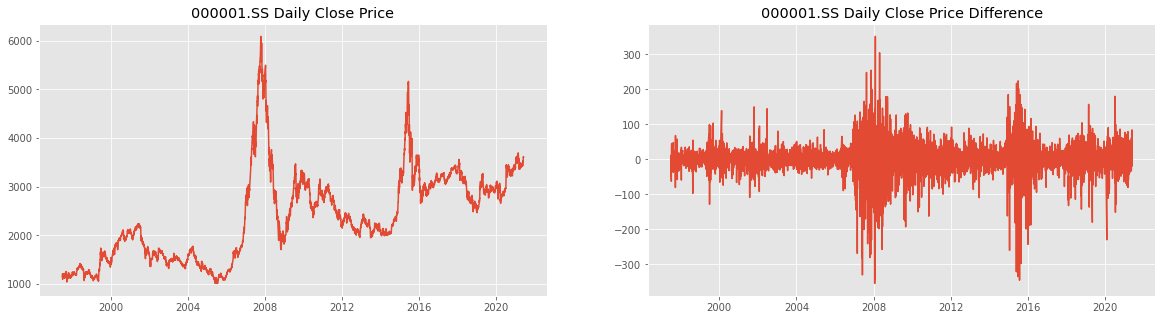

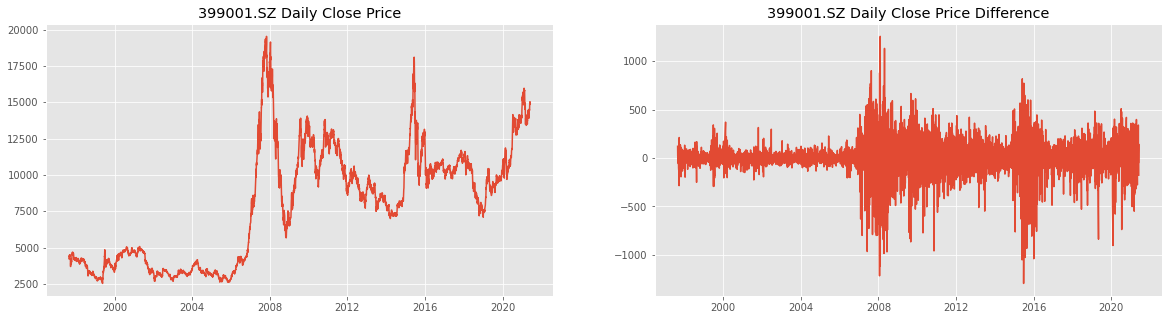

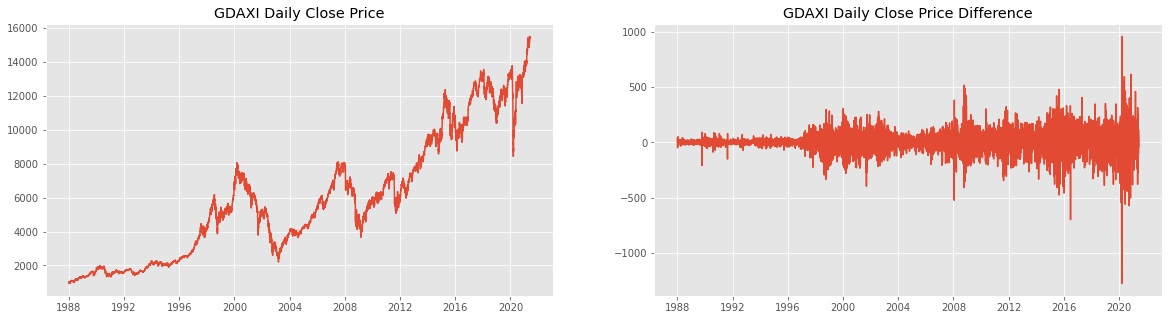

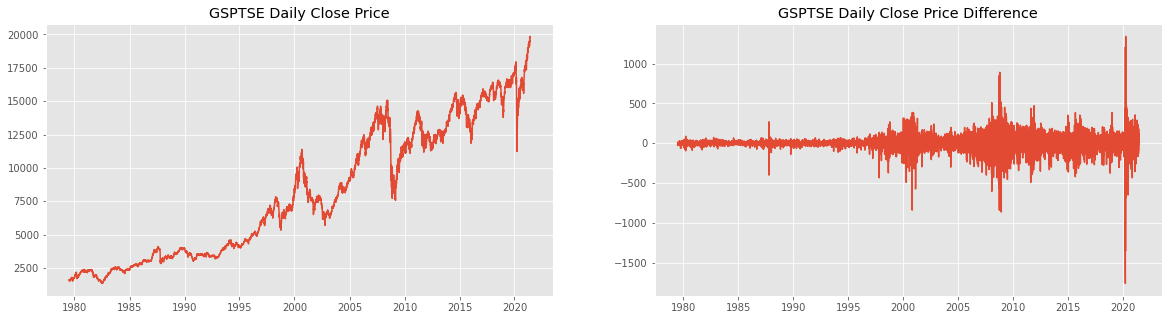

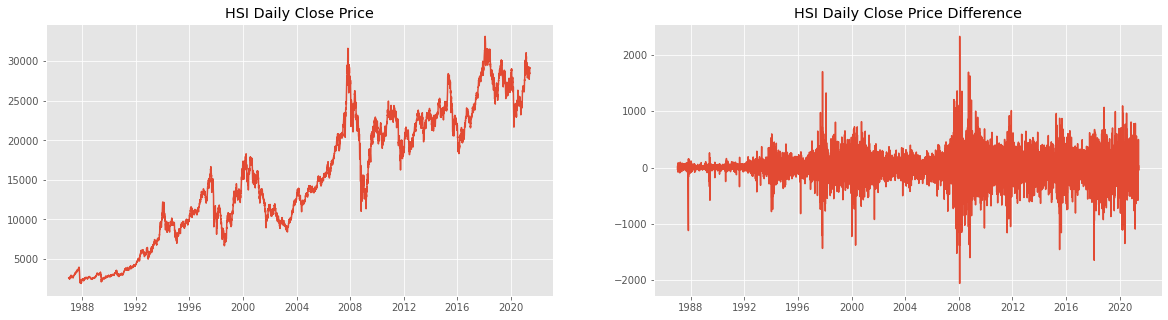

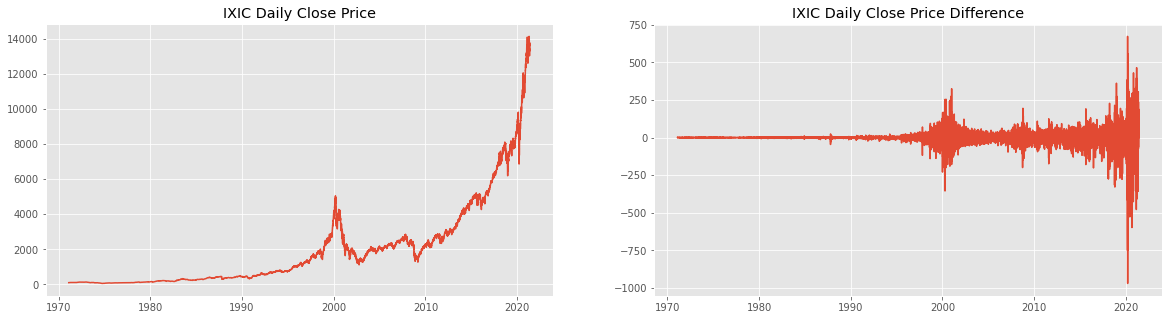

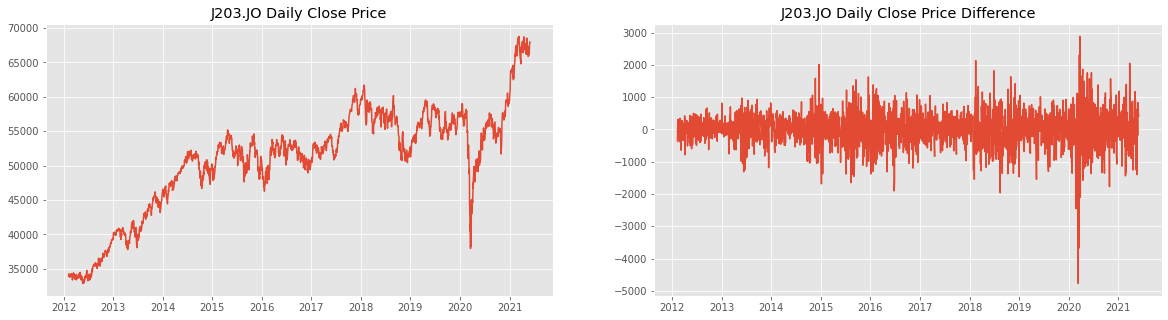

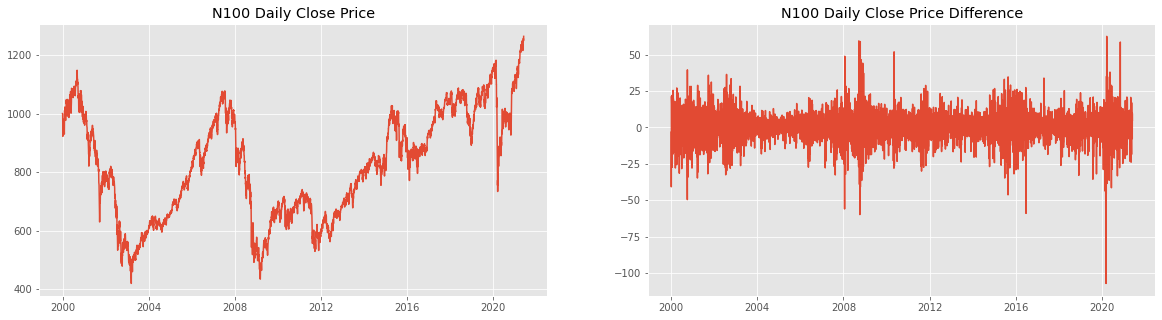

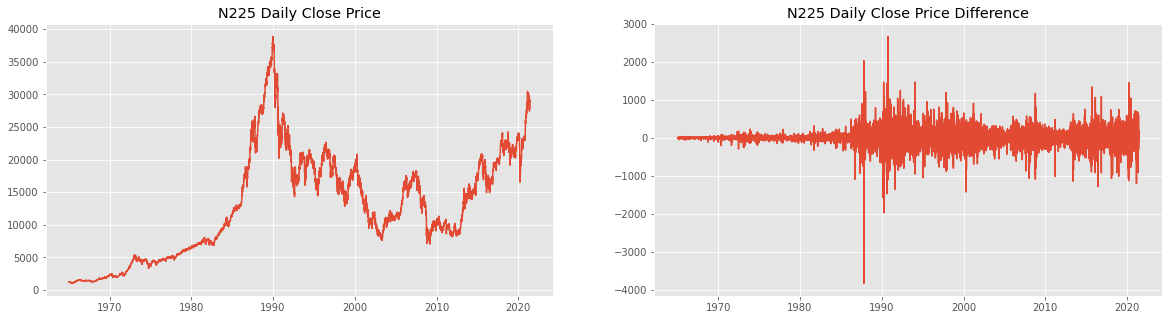

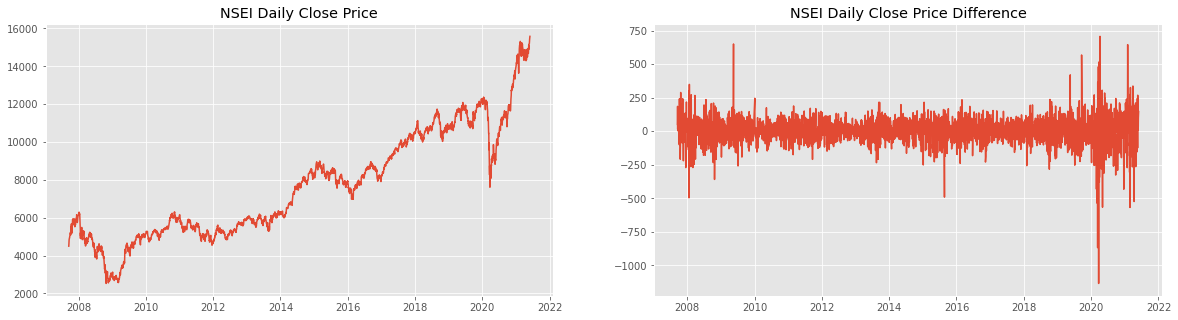

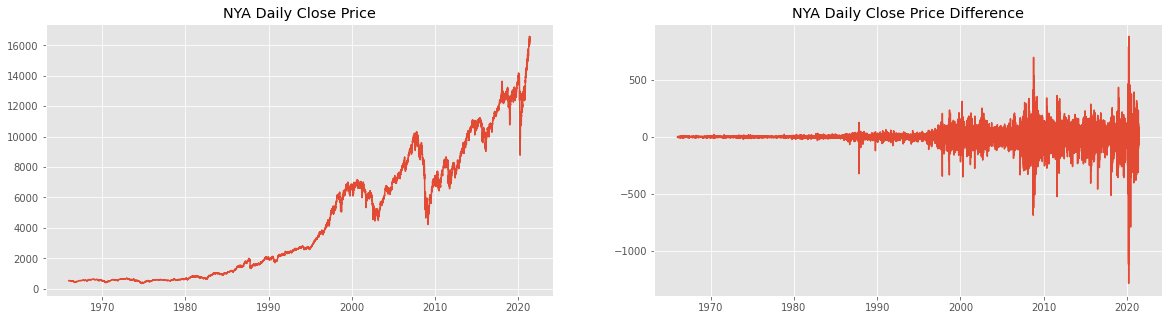

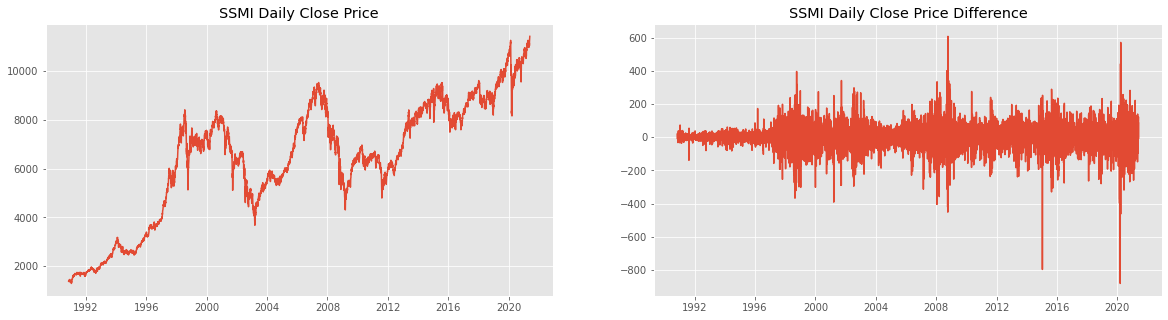

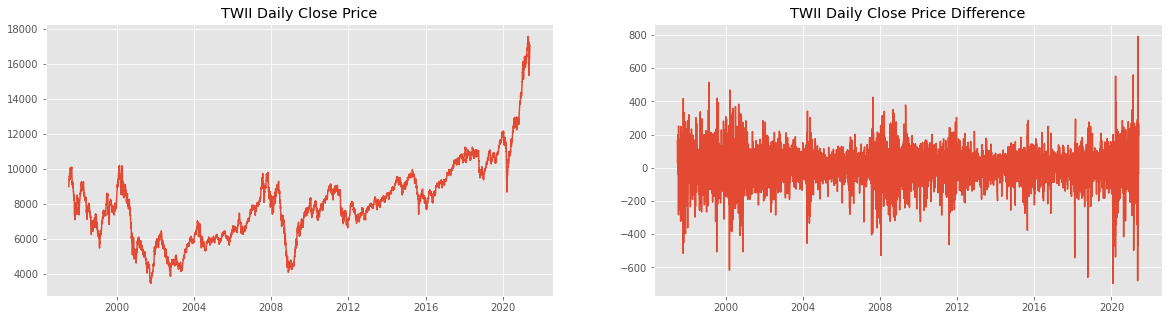

In [15]:
for i in df_sort['Index'].unique() : 
    
    fig , axs = plt.subplots(nrows=1 , ncols=2 , figsize=(20,5))
    
#     axs[0].plot(df_sort[df_sort['Index'] == i]['Open'])
    axs[0].plot(df_sort[df_sort['Index'] == i]['Close'])

    axs[1].plot(df_sort[df_sort['Index'] == i]['Close'].diff())
    
    axs[0].set_title(f'{i} Daily Close Price')
    axs[1].set_title(f'{i} Daily Close Price Difference')
    
    plt.show()

In [16]:
#Predicting GDAXI Stock Index

In [18]:
gdaxi= df_sort[df_sort['Index']=='GDAXI']
gdaxi

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1987-12-30,GDAXI,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0.0,1226.331802
1988-01-04,GDAXI,956.489990,956.489990,956.489990,956.489990,956.489990,0.0,1166.917788
1988-01-05,GDAXI,996.099976,996.099976,996.099976,996.099976,996.099976,0.0,1215.241971
1988-01-06,GDAXI,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0.0,1227.332212
1988-01-07,GDAXI,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0.0,1237.653365
...,...,...,...,...,...,...,...,...
2021-05-25,GDAXI,15548.290040,15568.599610,15465.089840,15465.089840,15465.089840,92981200.0,18867.409605
2021-05-26,GDAXI,15520.440430,15541.860350,15407.480470,15450.719730,15450.719730,58668800.0,18849.878071
2021-05-27,GDAXI,15419.200200,15490.059570,15350.669920,15406.730470,15406.730470,119417800.0,18796.211173


In [19]:
gdaxi['Open_Close'] = gdaxi['Close'].values - gdaxi['Open'].values

/var/folders/5b/fy3fwxk14l517cymxblm8w2r0000gn/T/ipykernel_27763/342906142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdaxi['Open_Close'] = gdaxi['Close'].values - gdaxi['Open'].values


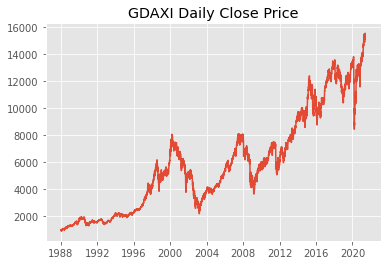

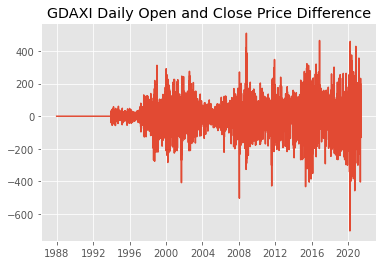

In [20]:
plt.plot(gdaxi['Close'])
plt.title('GDAXI Daily Close Price')
plt.show()

plt.plot(gdaxi['Open_Close'])
plt.title('GDAXI Daily Open and Close Price Difference')
plt.show()


In [21]:
gdaxi.sort_values('Close' , ascending=False)[['Close']][:3]


,Close
Date,
2021-05-28,15519.98047
2021-05-25,15465.08984
2021-04-16,15459.75000


In [ ]:
#Top three all time highest costs

In [22]:
gdaxi.sort_values('Close' , ascending=True)[['Close']][:3]


,Close
Date,
1988-01-29,936.00000
1988-01-28,937.76001
1988-01-21,949.23999


In [ ]:
#Top three all time lowest costs

In [23]:
gdaxi.sort_values('Open_Close' , ascending=False)[['Open_Close']][:3]


,Open_Close
Date,
2008-10-28,508.540039
2016-11-09,464.120120
2020-03-24,458.510743


In [24]:
#Top three all time highest open and close price difference

In [25]:
gdaxi.sort_values('Open_Close' , ascending=True)[['Open_Close']][:3]


,Open_Close
Date,
2020-03-12,-702.860351
2008-01-21,-502.490235
2020-09-21,-456.459960


In [26]:
#Top three all time lowest open and close price difference

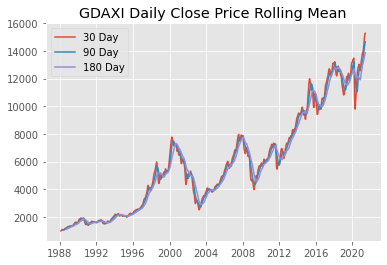

In [27]:
plt.plot(gdaxi['Close'].rolling(30).mean() , label='30 Day')
plt.plot(gdaxi['Close'].rolling(90).mean() , label='90 Day')
plt.plot(gdaxi['Close'].rolling(180).mean() , label='180 Day')
plt.title('GDAXI Daily Close Price Rolling Mean')
plt.legend()


In [28]:
test_size = len(gdaxi[gdaxi.index > '2019-01-01'])
test_size


608

Text(0.5, 1.0, 'GDAXI Daily Close Price After 2019')

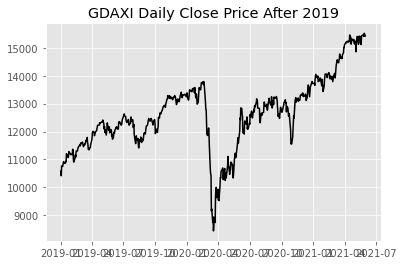

In [29]:
close_train = gdaxi[['Close']][ : -test_size]
close_test = gdaxi[['Close']][-test_size : ]
plt.plot(close_test , color='black')
plt.title('GDAXI Daily Close Price After 2019')


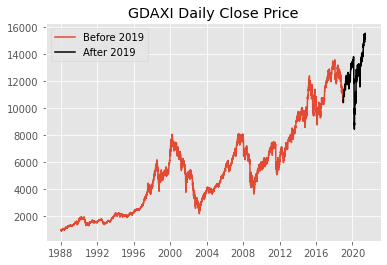

In [30]:
plt.plot(close_train , label='Before 2019')
plt.plot(close_test , color='black' , label='After 2019')
plt.title('GDAXI Daily Close Price')
plt.legend()


In [31]:
scaler = StandardScaler()
data_train = scaler.fit_transform(close_train.values)
data_test = scaler.transform(close_test.values)

In [32]:
print('Train shape :',data_train.shape)
print('Test shape :',data_test.shape)


Train shape : (7830, 1)
Test shape : (608, 1)


In [33]:
n_steps=30

In [34]:
gen_train = TimeseriesGenerator(data_train, data_train, length=n_steps)
gen_test = TimeseriesGenerator(data_test, data_test, length=n_steps)

In [35]:
#Input data generation for LSTM

In [36]:
model = Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

Metal device set to: Apple M1


2023-10-23 16:25:12.295729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-23 16:25:12.295841: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [38]:
model_history = model.fit(gen_train , batch_size=1 , epochs=50)


Epoch 1/50


2023-10-23 16:27:53.302414: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-10-23 16:27:54.177743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-23 16:27:54.403456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-23 16:27:54.866006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-23 16:27:56.053111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-23 16:27:56.806309: I tensorflow/core/grappler

61/61 [==============================] - 6s 29ms/step - loss: 0.0780
Epoch 2/50
61/61 [==============================] - 1s 17ms/step - loss: 0.0247
Epoch 3/50
61/61 [==============================] - 1s 17ms/step - loss: 0.0068
Epoch 4/50
61/61 [==============================] - 1s 17ms/step - loss: 0.0040
Epoch 5/50
61/61 [==============================] - 1s 17ms/step - loss: 0.0033
Epoch 6/50
61/61 [==============================] - 1s 17ms/step - loss: 0.0030
Epoch 7/50
61/61 [==============================] - 1s 17ms/step - loss: 0.0101
Epoch 8/50
61/61 [==============================] - 1s 17ms/step - loss: 0.0167
Epoch 9/50
61/61 [==============================] - 1s 18ms/step - loss: 0.0332
Epoch 10/50
61/61 [==============================] - 1s 17ms/step - loss: 0.0039
Epoch 11/50
61/61 [==============================] - 1s 17ms/step - loss: 0.0036
Epoch 12/50
61/61 [==============================] - 1s 18ms/step - loss: 0.0033
Epoch 13/50
61/61 [=============================

In [ ]:
#Modeling

Text(0.5, 1.0, 'Loss')

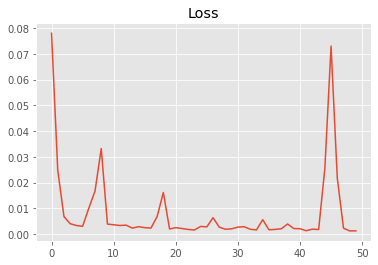

In [39]:
plt.plot(model_history.history['loss'])
plt.title('Loss')


In [40]:
prediction = model.predict(gen_test)


2023-10-23 16:29:36.557025: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-10-23 16:29:36.726458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/5 [=====>........................] - ETA: 1s

2023-10-23 16:29:36.776398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-23 16:29:36.810173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 29ms/step


In [43]:
index_after_2019 = gdaxi[gdaxi.index > '2019-01-01'].index


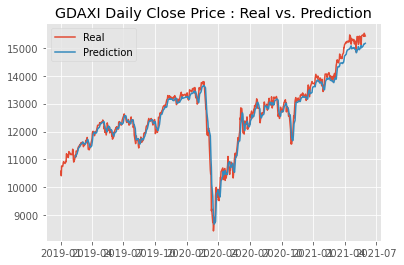

In [44]:
# plt.plot(index_after_2019[:len(data_test)] , scaler.inverse_transform(data_test) , label='Real Close Price')
plt.plot(index_after_2019 , scaler.inverse_transform(data_test) , label='Real')
plt.plot(index_after_2019[n_steps : ] , scaler.inverse_transform(prediction) , label='Prediction')
plt.title('GDAXI Daily Close Price : Real vs. Prediction')
plt.legend()